In [34]:
import pandas as pd
import time
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
path = '../datasets/'

dtypes = {
        'ip'            : 'uint32',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        'click_id'      : 'uint32'
        }

In [3]:
train_df = pd.read_csv(path+"train_sample.csv", 
                       dtype=dtypes, 
                       usecols=['ip','app','device',
                                'os', 'channel', 'click_time', 
                                'is_attributed'])



In [4]:
train_df.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0


In [5]:
train_df['hour'] = pd.to_datetime(train_df.click_time).dt.hour.astype('uint8')
train_df['day'] = pd.to_datetime(train_df.click_time).dt.day.astype('uint8')

In [6]:
train_df.head()

,ip,app,device,os,channel,click_time,is_attributed,hour,day
0,87540,12,1,13,497,2017-11-07 09:30:38,0,9,7
1,105560,25,1,17,259,2017-11-07 13:40:27,0,13,7
2,101424,12,1,19,212,2017-11-07 18:05:24,0,18,7
3,94584,13,1,13,477,2017-11-07 04:58:08,0,4,7
4,68413,12,1,1,178,2017-11-09 09:00:09,0,9,9


In [7]:
gp = train_df[['ip','day','hour','channel']]\
    .groupby(by=['ip','day','hour'])[['channel']]\
    .count().reset_index()\
    .rename(index=str, columns={'channel': 'ip_day_hour_count_channel'})

gp.tail()

,ip,day,hour,ip_day_hour_count_channel
89848,364515,9,15,1
89849,364621,9,7,1
89850,364630,9,3,1
89851,364648,9,12,1
89852,364757,8,16,1


In [8]:
# gp2 = train_df[['ip','day','hour','channel','os']]\
#     .groupby(by=['ip','day'])[['os']]\
#     .count().reset_index()\
#     .rename(index=str, columns={'os': 'os_tcount'})

# gp2.head(10)

In [9]:
train_df = train_df.merge(gp, on=['ip','day','hour'], how='left')
train_df.head()

,ip,app,device,os,channel,click_time,is_attributed,hour,day,ip_day_hour_count_channel
0,87540,12,1,13,497,2017-11-07 09:30:38,0,9,7,1
1,105560,25,1,17,259,2017-11-07 13:40:27,0,13,7,4
2,101424,12,1,19,212,2017-11-07 18:05:24,0,18,7,1
3,94584,13,1,13,477,2017-11-07 04:58:08,0,4,7,1
4,68413,12,1,1,178,2017-11-09 09:00:09,0,9,9,1


In [10]:
gp = train_df[['ip', 'app', 'channel']].groupby(by=['ip', 'app'])[['channel']].count().reset_index().rename(index=str, columns={'channel': 'ip_app_count_channel'})
train_df = train_df.merge(gp, on=['ip','app'], how='left')

In [11]:
train_df.head()

,ip,app,device,os,channel,click_time,is_attributed,hour,day,ip_day_hour_count_channel,ip_app_count_channel
0,87540,12,1,13,497,2017-11-07 09:30:38,0,9,7,1,3
1,105560,25,1,17,259,2017-11-07 13:40:27,0,13,7,4,4
2,101424,12,1,19,212,2017-11-07 18:05:24,0,18,7,1,1
3,94584,13,1,13,477,2017-11-07 04:58:08,0,4,7,1,1
4,68413,12,1,1,178,2017-11-09 09:00:09,0,9,9,1,2


In [12]:
gp = train_df[['ip','app', 'os', 'channel']].groupby(by=['ip', 'app', 'os'])[['channel']].count().reset_index().rename(index=str, columns={'channel': 'ip_app_os_count_channel'})
train_df = train_df.merge(gp, on=['ip','app', 'os'], how='left')

In [13]:
train_df.head()

,ip,app,device,os,channel,click_time,is_attributed,hour,day,ip_day_hour_count_channel,ip_app_count_channel,ip_app_os_count_channel
0,87540,12,1,13,497,2017-11-07 09:30:38,0,9,7,1,3,2
1,105560,25,1,17,259,2017-11-07 13:40:27,0,13,7,4,4,1
2,101424,12,1,19,212,2017-11-07 18:05:24,0,18,7,1,1,1
3,94584,13,1,13,477,2017-11-07 04:58:08,0,4,7,1,1,1
4,68413,12,1,1,178,2017-11-09 09:00:09,0,9,9,1,2,1


In [14]:
gp = train_df[['ip','day','hour','channel']].groupby(by=['ip','day','channel'])[['hour']].var().reset_index().rename(index=str, columns={'hour': 'ip_tchan_count'})
train_df = train_df.merge(gp, on=['ip','day','channel'], how='left')

In [15]:
train_df.head()

,ip,app,device,os,channel,click_time,is_attributed,hour,day,ip_day_hour_count_channel,ip_app_count_channel,ip_app_os_count_channel,ip_tchan_count
0,87540,12,1,13,497,2017-11-07 09:30:38,0,9,7,1,3,2,NaN
1,105560,25,1,17,259,2017-11-07 13:40:27,0,13,7,4,4,1,19.0
2,101424,12,1,19,212,2017-11-07 18:05:24,0,18,7,1,1,1,NaN
3,94584,13,1,13,477,2017-11-07 04:58:08,0,4,7,1,1,1,NaN
4,68413,12,1,1,178,2017-11-09 09:00:09,0,9,9,1,2,1,NaN


In [16]:
gp = train_df[['ip','app', 'os', 'hour']].\
            groupby(by=['ip', 'app', 'os'])[['hour']].\
            var().reset_index().\
            rename(index=str, columns={'hour': 'ip_app_os_var'})

train_df = train_df.merge(gp, on=['ip','app', 'os'], how='left')

In [17]:
train_df.head()

,ip,app,device,os,channel,click_time,is_attributed,hour,day,ip_day_hour_count_channel,ip_app_count_channel,ip_app_os_count_channel,ip_tchan_count,ip_app_os_var
0,87540,12,1,13,497,2017-11-07 09:30:38,0,9,7,1,3,2,NaN,24.5
1,105560,25,1,17,259,2017-11-07 13:40:27,0,13,7,4,4,1,19.0,NaN
2,101424,12,1,19,212,2017-11-07 18:05:24,0,18,7,1,1,1,NaN,NaN
3,94584,13,1,13,477,2017-11-07 04:58:08,0,4,7,1,1,1,NaN,NaN
4,68413,12,1,1,178,2017-11-09 09:00:09,0,9,9,1,2,1,NaN,NaN


In [18]:
gp = train_df[['ip','app', 'channel', 'day']].\
            groupby(by=['ip', 'app', 'channel'])[['day']].\
            var().reset_index().\
            rename(index=str, columns={'day': 'ip_app_channel_var_day'})

train_df = train_df.merge(gp, on=['ip','app', 'channel'], how='left')

In [19]:
train_df.head()

,ip,app,device,os,channel,click_time,is_attributed,hour,day,ip_day_hour_count_channel,ip_app_count_channel,ip_app_os_count_channel,ip_tchan_count,ip_app_os_var,ip_app_channel_var_day
0,87540,12,1,13,497,2017-11-07 09:30:38,0,9,7,1,3,2,NaN,24.5,NaN
1,105560,25,1,17,259,2017-11-07 13:40:27,0,13,7,4,4,1,19.0,NaN,0.25
2,101424,12,1,19,212,2017-11-07 18:05:24,0,18,7,1,1,1,NaN,NaN,NaN
3,94584,13,1,13,477,2017-11-07 04:58:08,0,4,7,1,1,1,NaN,NaN,NaN
4,68413,12,1,1,178,2017-11-09 09:00:09,0,9,9,1,2,1,NaN,NaN,NaN


In [20]:
gp = train_df[['ip','app', 'channel','hour']].\
            groupby(by=['ip', 'app', 'channel'])[['hour']].\
            mean().reset_index().\
            rename(index=str, columns={'hour': 'ip_app_channel_mean_hour'})

train_df = train_df.merge(gp, on=['ip','app', 'channel'], how='left')

In [21]:
train_df.head()

,ip,app,device,os,channel,click_time,is_attributed,hour,day,ip_day_hour_count_channel,ip_app_count_channel,ip_app_os_count_channel,ip_tchan_count,ip_app_os_var,ip_app_channel_var_day,ip_app_channel_mean_hour
0,87540,12,1,13,497,2017-11-07 09:30:38,0,9,7,1,3,2,NaN,24.5,NaN,9.0
1,105560,25,1,17,259,2017-11-07 13:40:27,0,13,7,4,4,1,19.0,NaN,0.25,11.5
2,101424,12,1,19,212,2017-11-07 18:05:24,0,18,7,1,1,1,NaN,NaN,NaN,18.0
3,94584,13,1,13,477,2017-11-07 04:58:08,0,4,7,1,1,1,NaN,NaN,NaN,4.0
4,68413,12,1,1,178,2017-11-09 09:00:09,0,9,9,1,2,1,NaN,NaN,NaN,9.0


In [22]:
target = 'is_attributed'
predictors = ['app','device','os', 'channel', 'hour', 'day', 
              'ip_tcount', 'ip_tchan_count', 'ip_app_count',
              'ip_app_os_count', 'ip_app_os_var',
              'ip_app_channel_var_day','ip_app_channel_mean_hour']

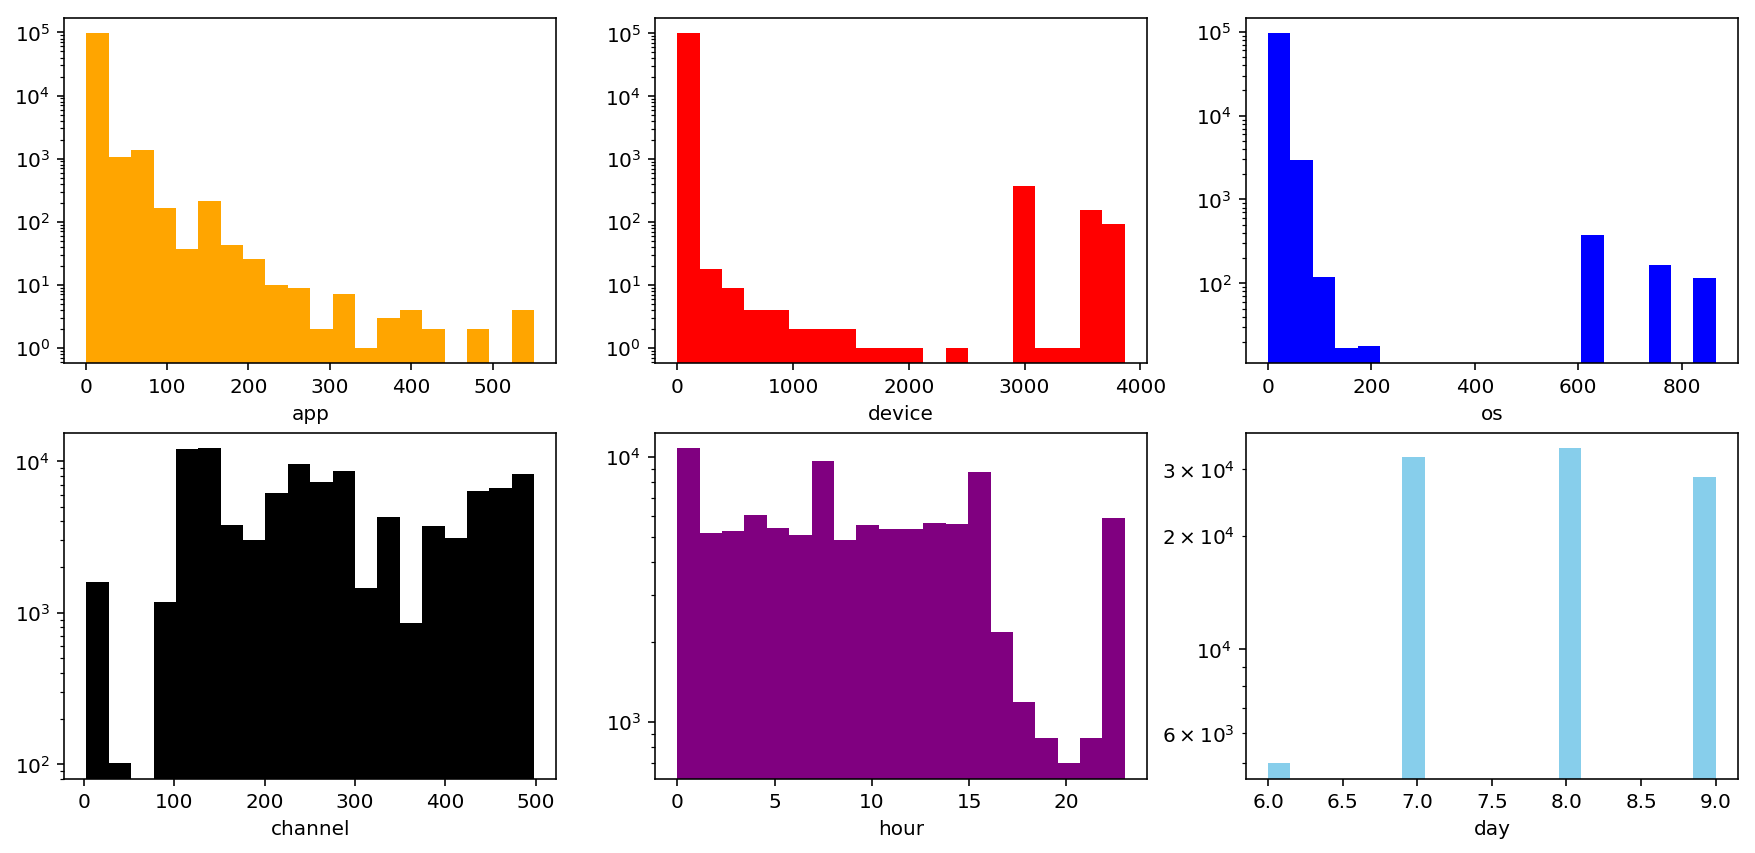

In [51]:
cols = ['app','device','os', 'channel', 'hour', 'day']
colors = ['orange', 'red', 'blue', 'black', 'purple', 'skyblue']
plt.figure(figsize=(15,7))


for counter, colnm in enumerate(cols,1):

    plt.subplot(2, 3, counter)
    plt.hist(train_df[colnm], bins = 20, 
             log=True, color = colors[counter-1])
    
    plt.xlabel(colnm)

In [ ]:

# 'ip_app_os_count', 'ip_app_os_var',
# 'ip_app_channel_var_day','ip_app_channel_mean_hour'